##########Model Serving
There are many frameworks available for serving LLMs. Some are focused on high throughput and scalability and some are geared more towards individual usage.

##########Ollama
Ollama is an easy to use model framework which uses Docker-esque syntax and makes it easy to download and serve LLMs. We will use ollama for this workshop but if you interested in more "production-grade" solutions, please take a look at vLLM and DeepSpeed

Installing Ollama
curl https://ollama.ai/install.sh | sh

Configuring Ollama
Ollama's behaviour can be modified by using systemctl edit. Of particular importance to us are the parameters shown below:

NO_PROXY, HTTP_PROXY, and HTTPS_PROXY are important if you intend to run Ollama inside a private network.
OLLAMA_HOST can be set if you would like to change the port number to which Ollama listens.
OLLAMA_NUM_PARALLEL can be set to allow handling of simultaneous requests to the server. Based on your system resources such as CPU, RAM, and VRAM, some amount of trial and error might be needed to arrive at an optimal number for this value. Values which are too high can crash the Ollama service.
sudo systemctl edit --full ollama.service
[Service]
...
Environment="NO_PROXY=localhost,127.0.0.1"
Environment="HTTP_PROXY=http://http.myproxy.myco.com:1234/"
Environment="HTTPS_PROXY=http://http.myproxy.myco.com:1234/"
Environment="OLLAMA_HOST=0.0.0.0:8443"
Environment="OLLAMA_NUM_PARALLEL=2"
sudo systemctl restart ollama.service

Configuring Ollama CLI
If you have modified the OLLAMA_HOST variable in the previous step, you must also make the same similar in your terminal environment variables for Ollama CLI to work properly. The syntax is similar to what is used by the Docker CLI.

echo "" | tee -a ~/.bashrc
echo "export OLLAMA_HOST=127.0.0.1:8443" | tee -a ~/.bashrc
source ~/.bashrc

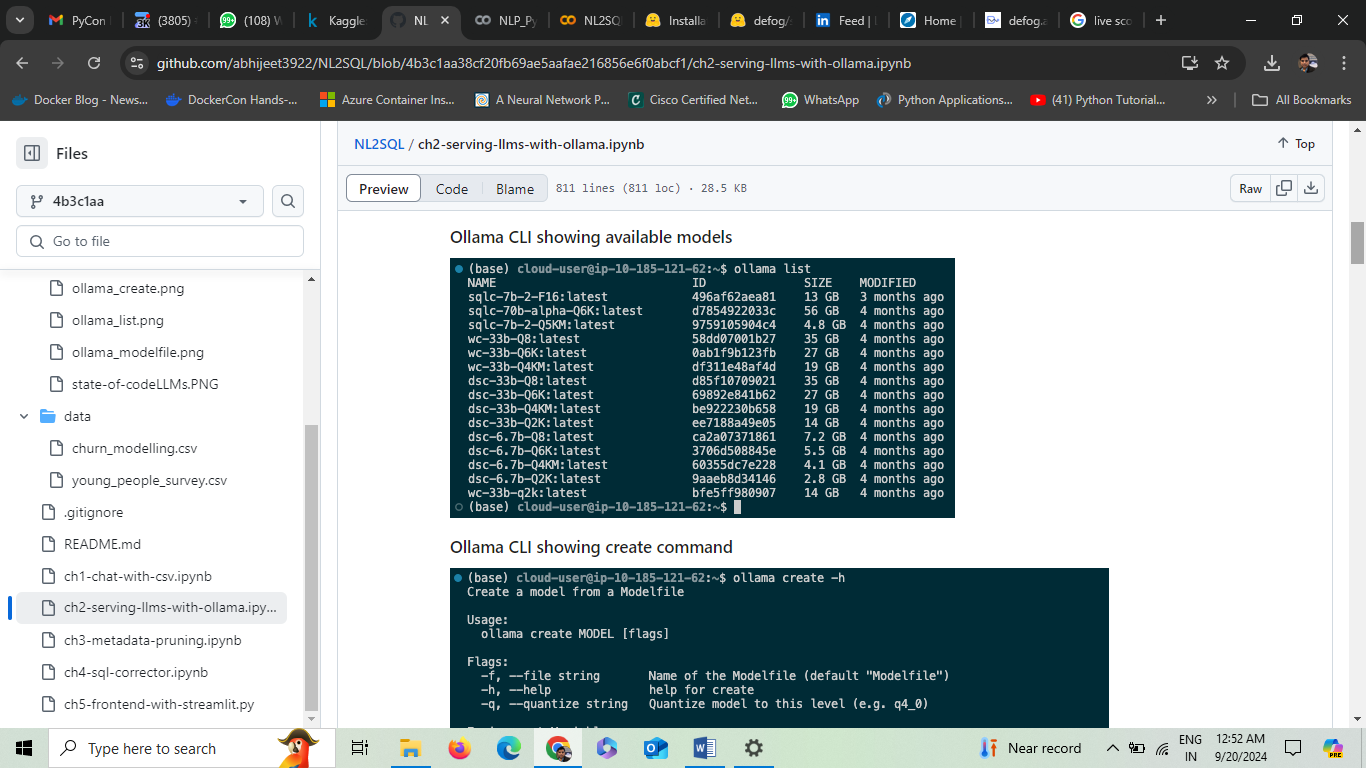

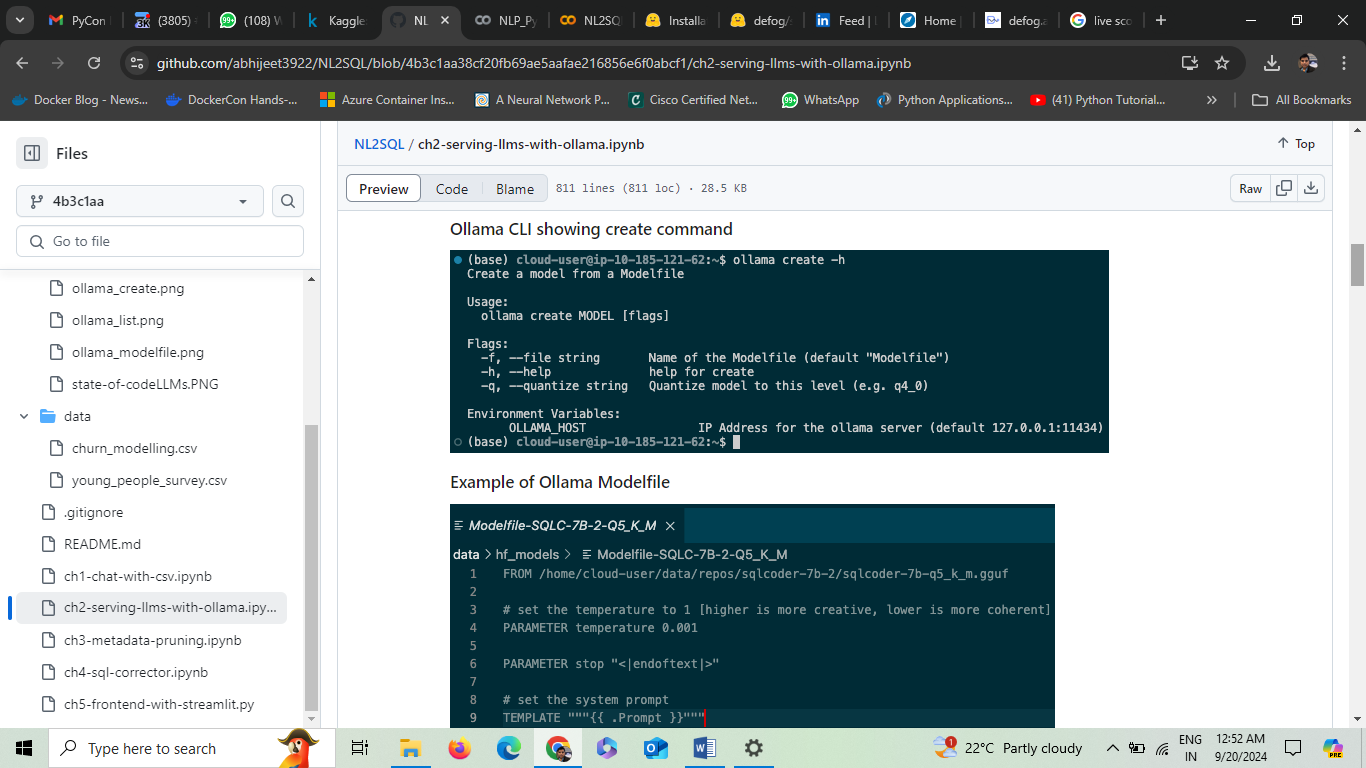

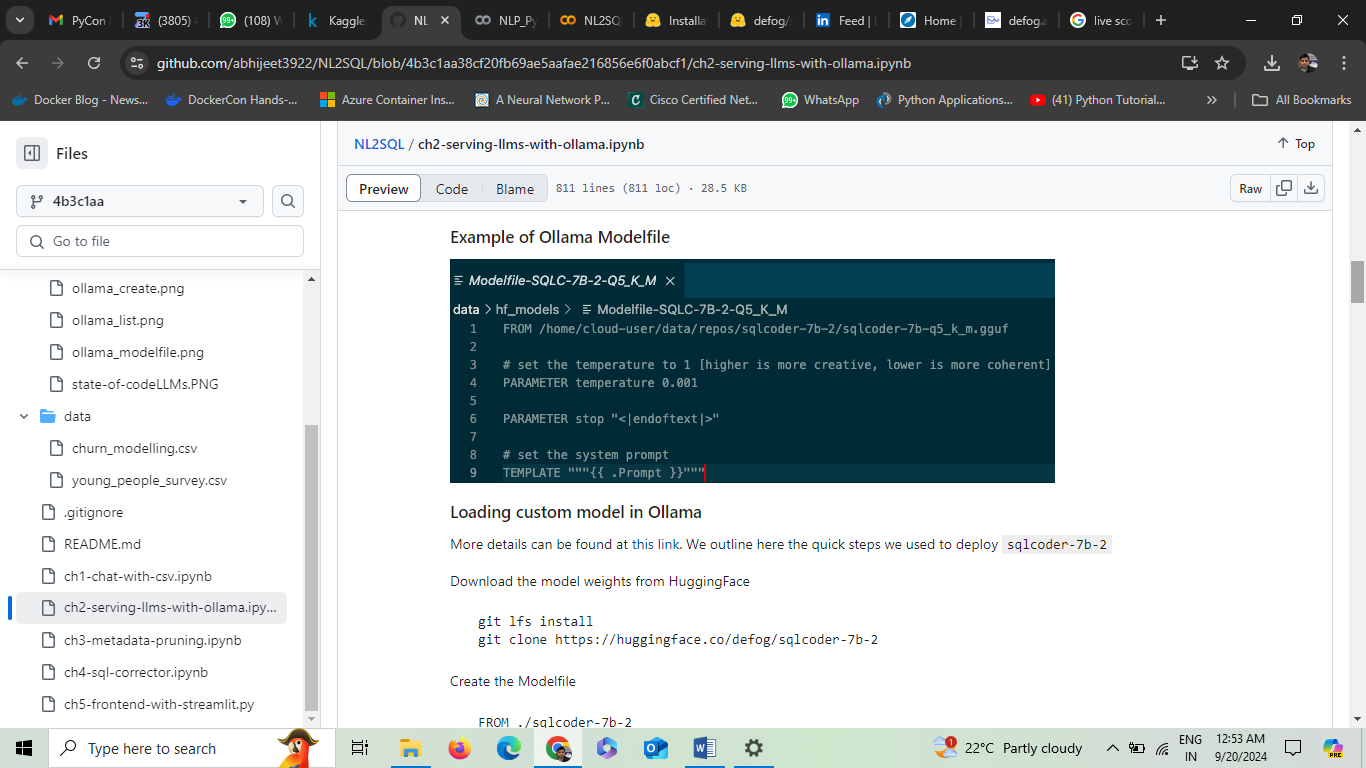

Loading custom model in Ollama
More details can be found at this link. We outline here the quick steps we used to deploy sqlcoder-7b-2

Download the model weights from HuggingFace

git lfs install
git clone https://huggingface.co/defog/sqlcoder-7b-2

Create the Modelfile

FROM ./sqlcoder-7b-2
PARAMETER temperature 0.001
PARAMETER stop "<|endoftext|>"
TEMPLATE """{{ .Prompt }}"""

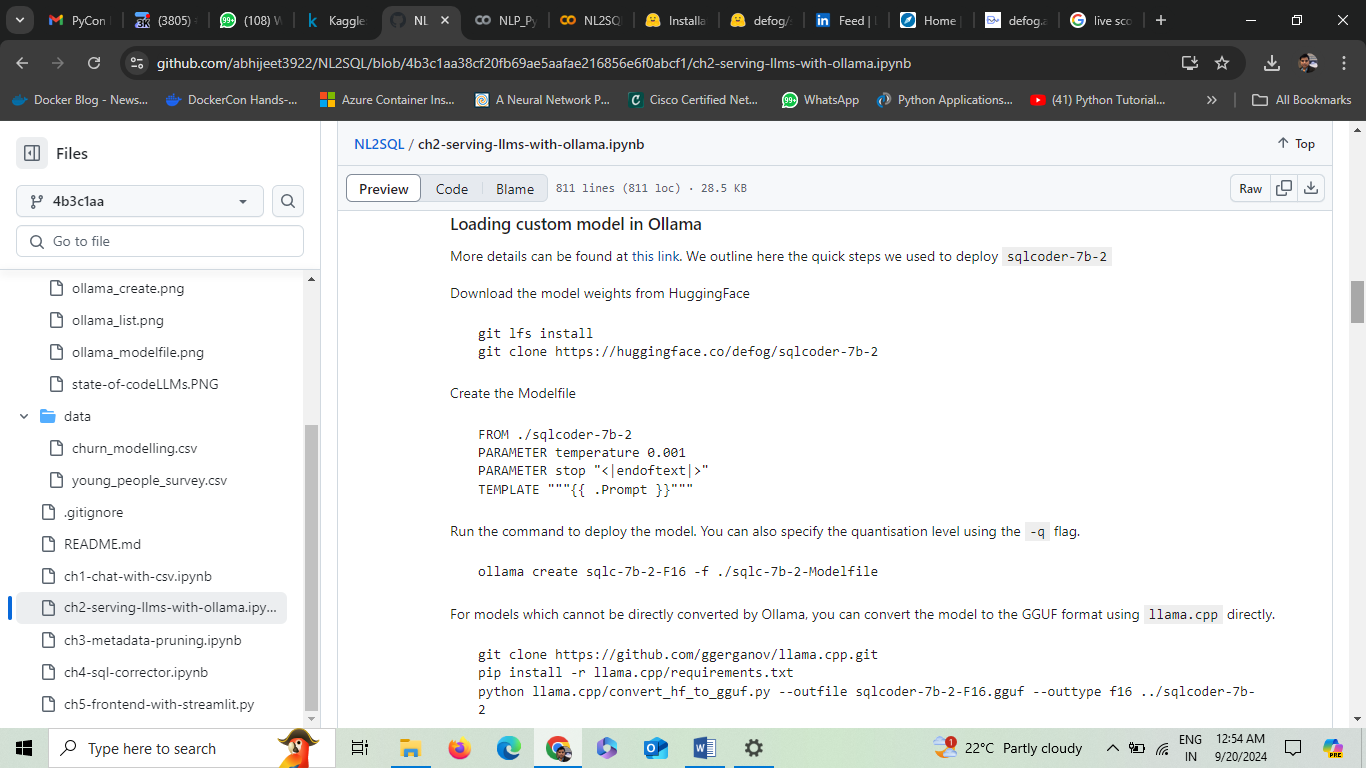

Using Ollama as model server
Once you have installed your model in Ollama, either by using ollama run or using ollama create with your custom Modelfile, you can query your models. While the Ollama server has a REST API which you can directly query, you can also use tools like the Continue extension for VSCode which provides you with an experience similar to GitHub Copilot.

In [1]:
import requests
import json

class OLLAMA:
    def __init__(self, OLLAMA_URL, model_name):
        self.model_name = model_name
        self.ollama_url = OLLAMA_URL
        self.ollama_endpoint = "/api/generate"

    def run(self, prompt):
        data = {
            'model': self.model_name,
            'prompt': prompt,
            'stream':False
        }

        headers = {
            'Accept':'application/json',
            'Content-Type':'application/json'
        }

        resp = requests.post(url = f"{self.ollama_url}{self.ollama_endpoint}", data = json.dumps(data), headers = headers)
        query = resp.json()['response']

        return query

In [2]:

prompt = '''### Task
Generate a SQL query to answer [QUESTION]Which are the rows which have 1 for at least one music related column?[/QUESTION]

### Instructions
- If you cannot answer the question with the available database schema, return 'I do not know'

## Database Schema
This query will run on a database whose schema is represented in this string: CREATE TABLE "young-people-survey" (
	"Music" FLOAT,
	"Slow songs or fast songs" FLOAT,
	"Dance" FLOAT,
	"Folk" FLOAT,
	"Country" FLOAT,
	"Classical music" FLOAT,
	"Musical" FLOAT,
	"Pop" FLOAT,
	"Rock" FLOAT,
	"Metal or Hardrock" FLOAT,
	"Punk" FLOAT,
	"Hiphop, Rap" FLOAT,
	"Reggae, Ska" FLOAT,
	"Swing, Jazz" FLOAT,
	"Rock n roll" FLOAT,
	"Alternative" FLOAT,
	"Latino" FLOAT,
	"Techno, Trance" FLOAT,
	"Opera" FLOAT,
	"Movies" FLOAT,
	"Horror" FLOAT,
	"Thriller" FLOAT,
	"Comedy" FLOAT,
	"Romantic" FLOAT,
	"Sci-fi" FLOAT,
	"War" FLOAT,
	"Fantasy/Fairy tales" FLOAT,
	"Animated" FLOAT,
	"Documentary" FLOAT,
	"Western" FLOAT,
	"Action" FLOAT,
	"History" FLOAT,
	"Psychology" FLOAT,
	"Politics" FLOAT,
	"Mathematics" FLOAT,
	"Physics" FLOAT,
	"Internet" FLOAT,
	"PC" FLOAT,
	"Economy Management" FLOAT,
	"Biology" FLOAT,
	"Chemistry" FLOAT,
	"Reading" FLOAT,
	"Geography" FLOAT,
	"Foreign languages" FLOAT,
	"Medicine" FLOAT,
	"Law" FLOAT,
	"Cars" FLOAT,
	"Art exhibitions" FLOAT,
	"Religion" FLOAT,
	"Countryside, outdoors" FLOAT,
	"Dancing" FLOAT,
	"Musical instruments" FLOAT,
	"Writing" FLOAT,
	"Passive sport" FLOAT,
	"Active sport" FLOAT,
	"Gardening" FLOAT,
	"Celebrities" FLOAT,
	"Shopping" FLOAT,
	"Science and technology" FLOAT,
	"Theatre" FLOAT,
	"Fun with friends" FLOAT,
	"Adrenaline sports" FLOAT,
	"Pets" FLOAT,
	"Flying" FLOAT,
	"Storm" FLOAT,
	"Darkness" FLOAT,
	"Heights" FLOAT,
	"Spiders" FLOAT,
	"Snakes" BIGINT,
	"Rats" FLOAT,
	"Ageing" FLOAT,
	"Dangerous dogs" FLOAT,
	"Fear of public speaking" FLOAT,
	"Smoking" TEXT,
	"Alcohol" TEXT,
	"Healthy eating" FLOAT,
	"Daily events" FLOAT,
	"Prioritising workload" FLOAT,
	"Writing notes" FLOAT,
	"Workaholism" FLOAT,
	"Thinking ahead" FLOAT,
	"Final judgement" FLOAT,
	"Reliability" FLOAT,
	"Keeping promises" FLOAT,
	"Loss of interest" FLOAT,
	"Friends versus money" FLOAT,
	"Funniness" FLOAT,
	"Fake" FLOAT,
	"Criminal damage" FLOAT,
	"Decision making" FLOAT,
	"Elections" FLOAT,
	"Self-criticism" FLOAT,
	"Judgment calls" FLOAT,
	"Hypochondria" FLOAT,
	"Empathy" FLOAT,
	"Eating to survive" BIGINT,
	"Giving" FLOAT,
	"Compassion to animals" FLOAT,
	"Borrowed stuff" FLOAT,
	"Loneliness" FLOAT,
	"Cheating in school" FLOAT,
	"Health" FLOAT,
	"Changing the past" FLOAT,
	"God" FLOAT,
	"Dreams" BIGINT,
	"Charity" FLOAT,
	"Number of friends" BIGINT,
	"Punctuality" TEXT,
	"Lying" TEXT,
	"Waiting" FLOAT,
	"New environment" FLOAT,
	"Mood swings" FLOAT,
	"Appearence and gestures" FLOAT,
	"Socializing" FLOAT,
	"Achievements" FLOAT,
	"Responding to a serious letter" FLOAT,
	"Children" FLOAT,
	"Assertiveness" FLOAT,
	"Getting angry" FLOAT,
	"Knowing the right people" FLOAT,
	"Public speaking" FLOAT,
	"Unpopularity" FLOAT,
	"Life struggles" FLOAT,
	"Happiness in life" FLOAT,
	"Energy levels" FLOAT,
	"Small - big dogs" FLOAT,
	"Personality" FLOAT,
	"Finding lost valuables" FLOAT,
	"Getting up" FLOAT,
	"Interests or hobbies" FLOAT,
	"Parents' advice" FLOAT,
	"Questionnaires or polls" FLOAT,
	"Internet usage" TEXT,
	"Finances" FLOAT,
	"Shopping centres" FLOAT,
	"Branded clothing" FLOAT,
	"Entertainment spending" FLOAT,
	"Spending on looks" FLOAT,
	"Spending on gadgets" BIGINT,
	"Spending on healthy eating" FLOAT,
	"Age" FLOAT,
	"Height" FLOAT,
	"Weight" FLOAT,
	"Number of siblings" FLOAT,
	"Gender" TEXT,
	"Left - right handed" TEXT,
	"Education" TEXT,
	"Only child" TEXT,
	"Village - town" TEXT,
	"House - block of flats" TEXT
)

### Answer
Given the database schema, here is the SQL query that answers [QUESTION]Which are the rows which have 1 for at least one music related column?[/QUESTION] [SQL]'''

In [3]:
ollama = OLLAMA(OLLAMA_URL='https://c12e228748711.notebooksc.jarvislabs.net', model_name='sqlc-7b-2-Q5KM')
generated_sql = ollama.run(prompt)
generated_sql

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
# NOT WORKING
ollama = OLLAMA(OLLAMA_URL='https://c12e228748711.notebooksc.jarvislabs.net', model_name='sqlc-7b-2-F16')
generated_sql = ollama.run(prompt)
generated_sql

In [4]:
import pandas as pd

In [6]:
from sqlalchemy import create_engine
engine = create_engine(f"sqlite:///mysqlitedb.db")
table_name = 'young_people_survey'

try:
    df = pd.read_csv('/content/sample_data/young_people_survey.csv')
    df.to_sql(table_name, engine, index=False)
    print('Data loaded from CSV file!')
except ValueError as e:
    err_msg = e.args[0]
    if 'already exists' in err_msg:
        print('Table already exists in SQLite DB')

Data loaded from CSV file!


In [7]:
df = pd.read_csv('/content/sample_data/young_people_survey.csv')
df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


In [8]:
def generate_query(prompt, device='cpu'):
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    generated_ids = model.generate(
        **inputs,
        num_return_sequences=1,
        eos_token_id=tokenizer.eos_token_id,
        pad_token_id=tokenizer.eos_token_id,
        max_new_tokens=400,
        do_sample=False,
        num_beams=1,
    )
    outputs = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)

    if device == 'cuda':
        torch.cuda.empty_cache()
        torch.cuda.synchronize()
        # empty cache so that you do generate more results w/o memory crashing
        # particularly important on Colab – memory management is much more straightforward
        # when running on an inference service
    return outputs[0].split("[SQL]")[-1]

In [9]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

In [10]:
model_name = "defog/sqlcoder-7b-2"
tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    trust_remote_code=True,
    torch_dtype=torch.float16, # Disable if enabling the below line
    #load_in_8bit=True, # Disable if enabling the above line
    device_map="auto",
    use_cache=True,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/515 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/691 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/3.59G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [11]:
generated_sql = generate_query(prompt, device='cuda')
print(f'SQL generated by the model: {generated_sql}')

SQL generated by the model:  SELECT * FROM "young-people-survey" WHERE "Music" = 1 OR "Slow songs or fast songs" = 1 OR "Dance" = 1 OR "Folk" = 1 OR "Country" = 1 OR "Classical music" = 1 OR "Musical" = 1 OR "Pop" = 1 OR "Rock" = 1 OR "Metal or Hardrock" = 1 OR "Punk" = 1 OR "Hiphop, Rap" = 1 OR "Reggae, Ska" = 1 OR "Swing, Jazz" = 1 OR "Rock n roll" = 1 OR "Alternative" = 1 OR "Latino" = 1 OR "Techno, Trance" = 1 OR "Opera" = 1 OR "Movies" = 1 OR "Horror" = 1 OR "Thriller" = 1 OR "Comedy" = 1 OR "Romantic" = 1 OR "Sci-fi" = 1 OR "War" = 1 OR "Fantasy/Fairy tales" = 1 OR "Animated" = 1 OR "Documentary" = 1 OR "Western" = 1 OR "Action" = 1 OR "History" = 1 OR "Psychology" = 1 OR "Politics" = 1 OR "Mathematics" = 1 OR "Physics" = 1 OR "Internet" = 1 OR "PC" = 1 OR "Economy Management" = 1 OR "Biology" = 1 OR "Chemistry" = 1 OR "Reading" = 1 OR "Geography" = 1 OR "Foreign languages" = 1 OR


In [12]:
with engine.connect() as conn, conn.begin():
    query_result = pd.read_sql_query(generated_sql, conn)

query_result

OperationalError: (sqlite3.OperationalError) incomplete input
[SQL:  SELECT * FROM "young-people-survey" WHERE "Music" = 1 OR "Slow songs or fast songs" = 1 OR "Dance" = 1 OR "Folk" = 1 OR "Country" = 1 OR "Classical music" = 1 OR "Musical" = 1 OR "Pop" = 1 OR "Rock" = 1 OR "Metal or Hardrock" = 1 OR "Punk" = 1 OR "Hiphop, Rap" = 1 OR "Reggae, Ska" = 1 OR "Swing, Jazz" = 1 OR "Rock n roll" = 1 OR "Alternative" = 1 OR "Latino" = 1 OR "Techno, Trance" = 1 OR "Opera" = 1 OR "Movies" = 1 OR "Horror" = 1 OR "Thriller" = 1 OR "Comedy" = 1 OR "Romantic" = 1 OR "Sci-fi" = 1 OR "War" = 1 OR "Fantasy/Fairy tales" = 1 OR "Animated" = 1 OR "Documentary" = 1 OR "Western" = 1 OR "Action" = 1 OR "History" = 1 OR "Psychology" = 1 OR "Politics" = 1 OR "Mathematics" = 1 OR "Physics" = 1 OR "Internet" = 1 OR "PC" = 1 OR "Economy Management" = 1 OR "Biology" = 1 OR "Chemistry" = 1 OR "Reading" = 1 OR "Geography" = 1 OR "Foreign languages" = 1 OR]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

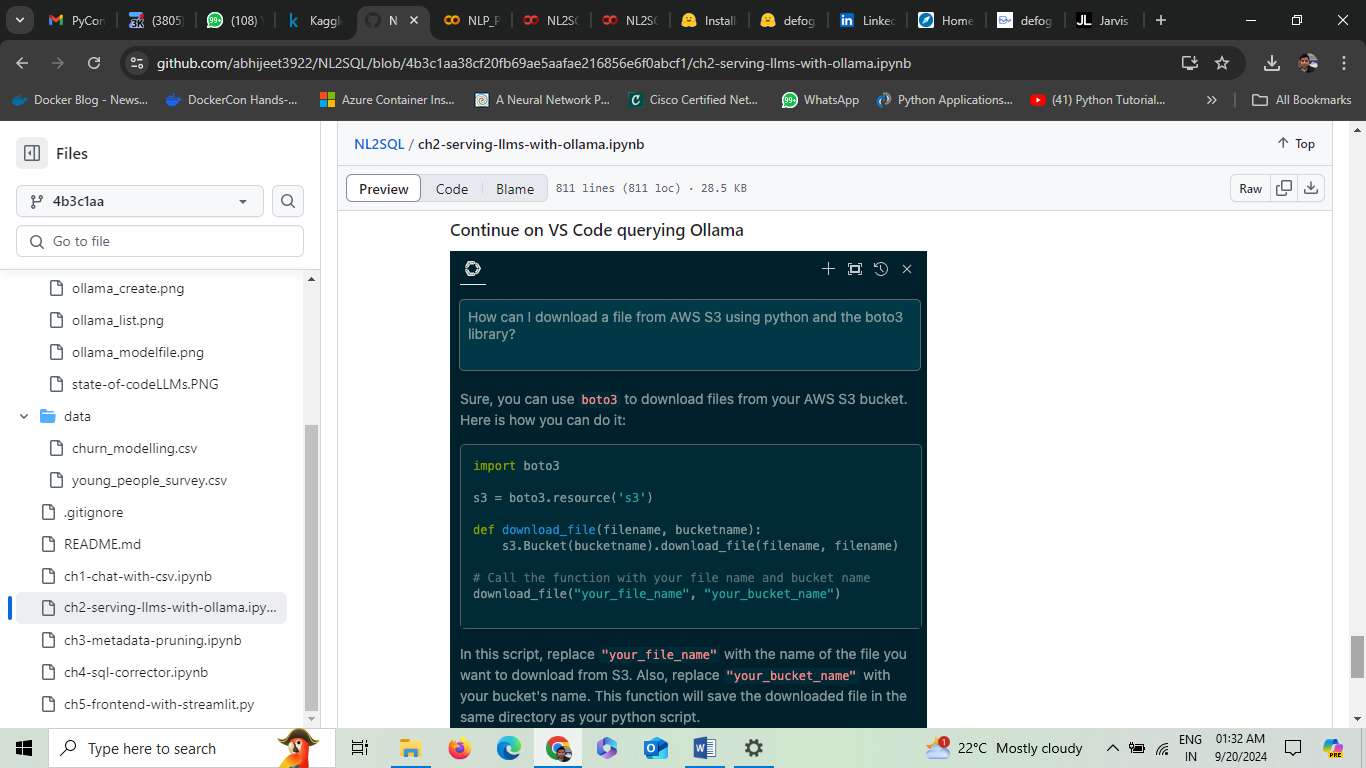

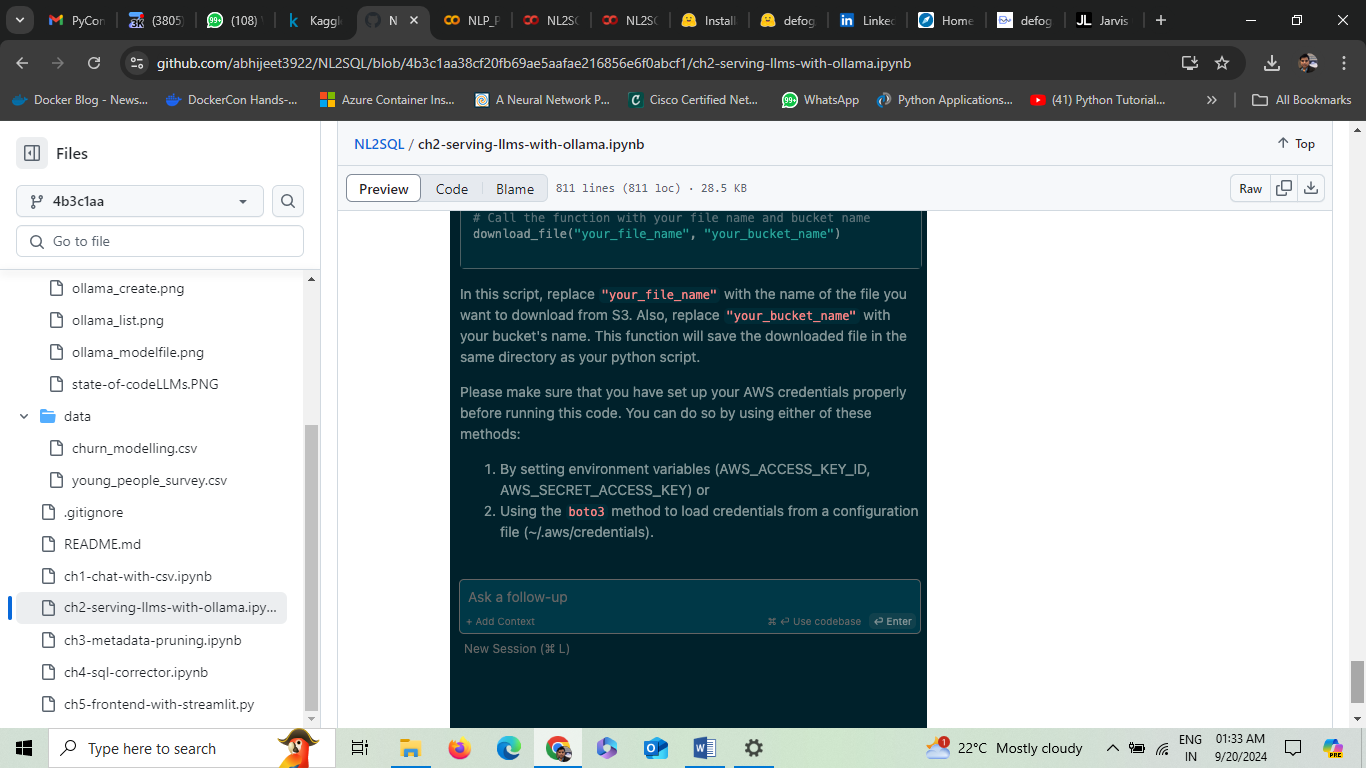